## Setup

In [1]:
%matplotlib widget

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy
from torch import nn
from tqdm.notebook import tqdm

### Source and Sensors
- an assistant is placing a source somewhere on the interior of a circle
- we install three sensors on the boundary of that circle
- a sensor receiving a signal computes the distance to the signals source
- this measurement is noisy
---
- first, we look at the forward problem, i.e. if we know the location of the source, what does the posterior landscape look like

In [233]:
source = torch.tensor([0.2, 0.2])
sensors = torch.tensor([[1, 0], [torch.cos(torch.tensor(13/12 * torch.pi)), torch.sin(torch.tensor(13/12 * torch.pi))], [torch.cos(torch.tensor(2/3 * torch.pi)), torch.sin(torch.tensor(2/3 * torch.pi))]])

In [4]:
x = torch.linspace(0, 2*torch.pi, 100)
y1 = torch.cos(x)
y2 = torch.sin(x)

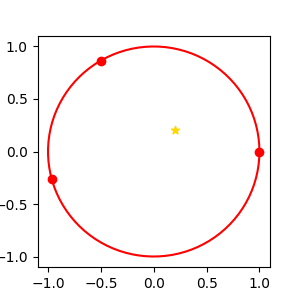

In [5]:
plt.figure(figsize=(3, 3))
plt.plot(y1, y2, color='red')
plt.scatter(source[0], source[1], color='gold', marker='*')
plt.scatter(sensors[:, 0], sensors[:, 1], color='red')

plt.xticks(torch.arange(-1.0, 1.5, 0.5))
plt.yticks(torch.arange(-1.0, 1.5, 0.5))

plt.show()

In [6]:
def measure(source, sensors):
    n = sensors.shape[0]
    y = torch.sum((sensors - source.repeat(n, 1))**2, dim=1)
    return y

In [7]:
pure_measurements = measure(source, sensors)

In [8]:
sigma = 1.0

In [9]:
def log_uniform_prior(x):
    if torch.sum(x**2) > 1:
        return -float('inf')
    else:
        return 0.0

def log_normal_density(x, mean, std):
    return - torch.log(torch.tensor(std)) - 0.5*torch.log(2*torch.tensor(torch.pi)) + 0.5*((x - mean) / std)**2
    
def log_normal_likelihood(x, mean, std):
    ll = torch.zeros(x.shape[1]) if len(x.shape) > 1 else 0.0 
    for i in range(x.shape[0]):
        ll += log_normal_density(x[i], mean[i], std)
    ll = ll.sum()
    return ll

In [10]:
x = torch.arange(-1.1, 1.11, 0.01)
y = torch.arange(-1.1, 1.11, 0.01)

z_grid = torch.meshgrid([x, y], indexing='ij')

In [11]:
sensors_1 = [sensors[:1], sensors[1:2], sensors[2:]]
source_measure_1 = [measure(source, sensors_1[k]) for k in range(3)]
z_1 = [torch.zeros_like(z_grid[0]) for _ in range(3)]

sensors_2 = [sensors[1:], sensors[::2], sensors[:2]]
source_measure_2 = [measure(source, sensors_2[k]) for k in range(3)]
z_2 = [torch.zeros_like(z_grid[0]) for _ in range(3)]

source_measure_3 = measure(source, sensors)
z_3 = torch.zeros_like(z_grid[0])

for i in tqdm(range(x.shape[0])):
    for j in tqdm(range(y.shape[0]), leave=False):
        xy = torch.tensor([x[i], y[j]])
        for k in range(3):
            f_1 = measure(xy, sensors_1[k])
            z_1[k][i, j] = -log_normal_likelihood(f_1, source_measure_1[k], sigma) + log_uniform_prior(xy)

            f_2 = measure(xy, sensors_2[k])
            z_2[k][i, j] = -log_normal_likelihood(f_2, source_measure_2[k], sigma) + log_uniform_prior(xy)

        f_3 = measure(xy, sensors)
        z_3[i, j] = -log_normal_likelihood(f_3, source_measure_3, sigma) + log_uniform_prior(xy)

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

  0%|          | 0/221 [00:00<?, ?it/s]

### Posterior landscapes with one sensor

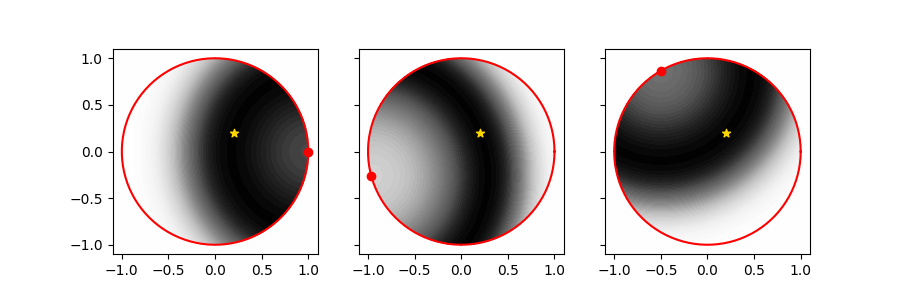

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey='row')

for k, ax in enumerate(axes):
    ax.set_aspect('equal')
    ax.contourf(z_grid[0], z_grid[1], torch.exp(z_1[k]), levels=50, cmap='Grays')

    ax.plot(y1, y2, color='red')
    ax.scatter(source[0], source[1], color='gold', marker='*')
    ax.scatter(sensors_1[k][:, 0], sensors_1[k][:, 1], color='red')
    
    ax.set_xticks(torch.arange(-1.0, 1.5, 0.5))
    ax.set_yticks(torch.arange(-1.0, 1.5, 0.5))

plt.show()

### Posterior landsacpes with two sensors

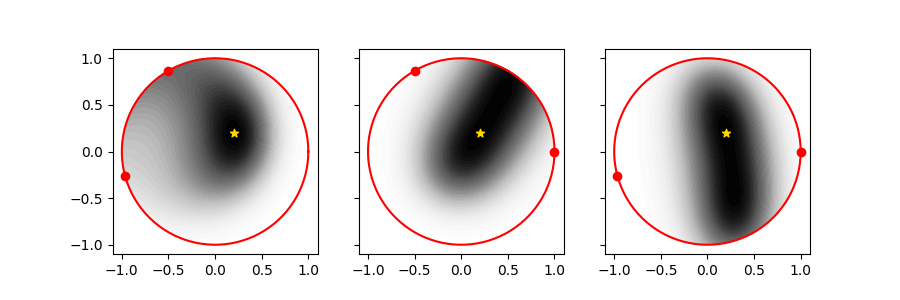

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey='row')

for k, ax in enumerate(axes):
    ax.set_aspect('equal')
    ax.contourf(z_grid[0], z_grid[1], torch.exp(z_2[k]), levels=50, cmap='Grays')

    ax.plot(y1, y2, color='red')
    ax.scatter(source[0], source[1], color='gold', marker='*')
    ax.scatter(sensors_2[k][:, 0], sensors_2[k][:, 1], color='red')
    
    ax.set_xticks(torch.arange(-1.0, 1.5, 0.5))
    ax.set_yticks(torch.arange(-1.0, 1.5, 0.5))

plt.show()

### Posterior landscape with three sensors

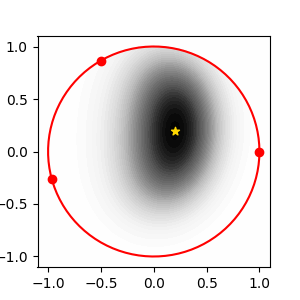

In [14]:
plt.figure(figsize=(3, 3))

plt.contourf(z_grid[0], z_grid[1], torch.exp(z_3), levels=50, cmap='Grays')

plt.plot(y1, y2, color='red')
plt.scatter(source[0], source[1], color='gold', marker='*')
plt.scatter(sensors[:, 0], sensors[:, 1], color='red')

plt.xticks(torch.arange(-1.0, 1.5, 0.5))
plt.yticks(torch.arange(-1.0, 1.5, 0.5))

plt.show()

## Estimation of the posterior
- we want to estimate the location of the source from the noisy measurements of the sensors, i.e. solve the inverse problem
- first, we let our "assistant" place the source somewhere at random within the circle
- then we make a series of measurements
- finally, we apply three common methods to estimate the posterior distribution of the source

In [234]:
#source_rad = torch.rand(2)
#source = source_rad[0]*torch.tensor([torch.cos(2*torch.pi*source_rad[1]), torch.sin(2*torch.pi*source_rad[1])])
sensors_seq = [sensors_1[2], sensors_2[1], sensors]

x = measure(source, sensors) + torch.randn(1, 3)
x = x.T

### Laplace Approximation

In [235]:
# assuming we can find the maximum with gradient ascent
z0 = source.clone()
z0.requires_grad = True

ll_1 = lambda z: - log_normal_likelihood(x[2:], measure(z, sensors_seq[0]), sigma)
hessian_1 = torch.autograd.functional.hessian(ll_1, z0)

sigma_1 = - scipy.linalg.solve(hessian_1, torch.eye(2))# + np.eye(2)
sigma_1_sqrt = torch.tensor(scipy.linalg.sqrtm(sigma_1), dtype=torch.float32)

In [236]:
z0 = source.clone()
z0.requires_grad = True

ll_2 = lambda z: - log_normal_likelihood(x[::2], measure(z, sensors_seq[1]), sigma)
hessian_2 = torch.autograd.functional.hessian(ll_2, z0)

sigma_2 = - scipy.linalg.solve(hessian_2, torch.eye(2))
sigma_2_sqrt = torch.tensor(scipy.linalg.sqrtm(sigma_2))

In [237]:
z0 = source.clone()
z0.requires_grad = True

ll_3 = lambda z: - log_normal_likelihood(x, measure(z, sensors_seq[2]), sigma).sum()
hessian_3 = torch.autograd.functional.hessian(ll_3, z0)

sigma_3 = - scipy.linalg.solve(hessian_3, torch.eye(2))
sigma_3_sqrt = torch.tensor(scipy.linalg.sqrtm(sigma_3))

In [238]:
samples = [
    z0.detach() + torch.randn(1000000, 2) @ sigma_1_sqrt, 
    z0.detach() + torch.randn(1000000, 2) @ sigma_2_sqrt, 
    z0.detach() + torch.randn(1000000, 2) @ sigma_3_sqrt
]

In [239]:
zs = [torch.exp(z_1[2]), torch.exp(z_2[1]), torch.exp(z_3)]

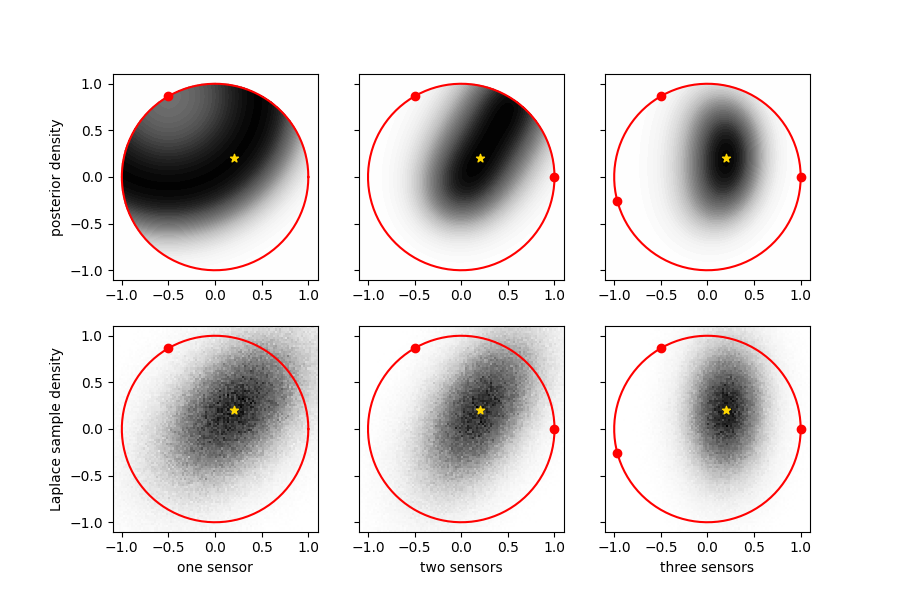

In [240]:
fig, axes = plt.subplots(2, 3, figsize=(9, 6), sharey='row')

for k, ax in enumerate(axes[0]):
    ax.set_aspect('equal')

    ax.contourf(z_grid[0], z_grid[1], zs[k], levels=50, cmap='Grays')

    ax.plot(y1, y2, color='red')
    ax.scatter(source[0], source[1], color='gold', marker='*')
    ax.scatter(sensors_seq[k][:, 0], sensors_seq[k][:, 1], color='red')
    
    ax.set_xticks(torch.arange(-1.0, 1.5, 0.5))
    ax.set_yticks(torch.arange(-1.0, 1.5, 0.5))

axes[0][0].set_ylabel('posterior density')

for k, ax in enumerate(axes[1]):
    ax.set_aspect('equal')

    ax.hist2d(samples[k][:, 0], samples[k][:, 1], bins=100, range=[[-1.1, 1.1], [-1.1, 1.1]], cmap='Grays')

    ax.plot(y1, y2, color='red')
    ax.scatter(source[0], source[1], color='gold', marker='*')
    ax.scatter(sensors_seq[k][:, 0], sensors_seq[k][:, 1], color='red')
    
    ax.set_xticks(torch.arange(-1.0, 1.5, 0.5))
    ax.set_yticks(torch.arange(-1.0, 1.5, 0.5))

axes[1][0].set_ylabel('Laplace sample density')

axes[1][0].set_xlabel('one sensor')
axes[1][1].set_xlabel('two sensors')
axes[1][2].set_xlabel('three sensors')

plt.show()

### Variational Inference

In [241]:
theta_mu = nn.Parameter(torch.zeros(2))
theta_sigma = nn.Parameter(2 * torch.eye(2))

In [242]:
def multi_measure(z, sensors):
    d = sensors.shape[0]
    n = z.shape[0]
    y = torch.zeros(n, d)
    for i in range(n):
        y[i, :] = measure(z[i], sensors)
    return y

In [243]:
def log_normal_posterior(x, mu, sigma):
    sigma = sigma.T @ sigma
    det_sigma = sigma[0, 0] * sigma[1, 1] - sigma[0, 1]**2
    sigma_inv = torch.tensor([[sigma[1, 1], -sigma[0, 1]], [-sigma[1, 0], sigma[0, 0]]])
    
    factor = - 0.5 * torch.log(2 * torch.pi * det_sigma)
    exp = - 0.5 * ((x - mu) @ sigma_inv * (x - mu)).sum(1) / det_sigma
    return  factor + exp

In [244]:
def log_normal_density(x, mu):
    factor = - 0.5 * torch.log(2 * torch.tensor(torch.pi))
    exp = - 0.5 * torch.sum((x - mu)**2, dim=1)
    return factor + exp

In [245]:
def ELBO(theta_mu, theta_sigma, sensors, n=100):
    epsilon = torch.randn(n, theta_mu.shape[0])
    theta = theta_mu + epsilon @ theta_sigma
    posterior = log_normal_posterior(theta, theta_mu, theta_sigma)
    
    y = multi_measure(theta, sensors)
    y_hat = measure(source, sensors)
    likeli = log_normal_density(y, y_hat)
    
    f = likeli - posterior
    return f.mean()

In [246]:
optimizer = torch.optim.AdamW([theta_mu, theta_sigma], lr=0.01, maximize=True)

In [247]:
scores = []
patience = 20
wait = 0
best = [-float('inf'), [theta_mu, theta_sigma]]
for e in tqdm(range(1000)):
    elbo = ELBO(theta_mu, theta_sigma, sensors_seq[2], 1000)
    
    optimizer.zero_grad()
    elbo.backward()
    optimizer.step()
    
    if elbo < best[0]:
        wait += 1
    else:
        wait = 0
        best[0] = elbo
        best[1] = [theta_mu, theta_sigma]
    if wait > patience: 
        scores = scores[:-patience]
        break
        
    scores.append(elbo.item())

  0%|          | 0/1000 [00:00<?, ?it/s]

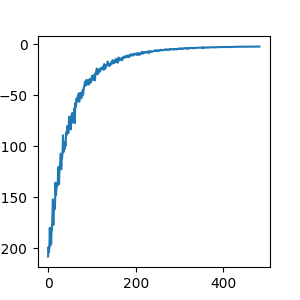

In [248]:
plt.figure(figsize=(3, 3))
plt.plot(scores)
plt.show()

In [249]:
samples = best[1][0] + torch.randn(1000000, best[1][0].shape[0]) @ best[1][1]
samples = samples.detach()

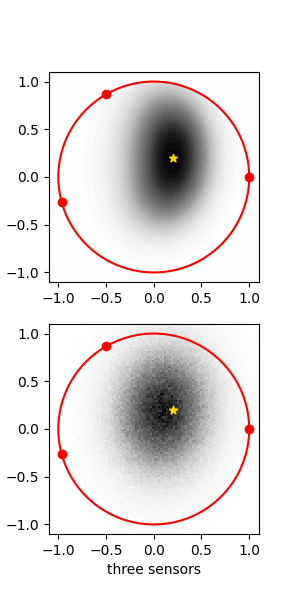

In [250]:
fig, axes = plt.subplots(2, 1, figsize=(3, 6), sharey='row')

axes[0].set_aspect('equal')

axes[0].contourf(z_grid[0], z_grid[1], zs[2], levels=50, cmap='Grays')

axes[0].plot(y1, y2, color='red')
axes[0].scatter(source[0], source[1], color='gold', marker='*')
axes[0].scatter(sensors_seq[2][:, 0], sensors_seq[2][:, 1], color='red')

axes[0].set_xticks(torch.arange(-1.0, 1.5, 0.5))
axes[0].set_yticks(torch.arange(-1.0, 1.5, 0.5))

axes[0].set_ylabel('posterior density')

axes[1].set_aspect('equal')

axes[1].hist2d(samples[:, 0], samples[:, 1], bins=100, range=[[-1.1, 1.1], [-1.1, 1.1]], cmap='Grays')

axes[1].plot(y1, y2, color='red')
axes[1].scatter(source[0], source[1], color='gold', marker='*')
axes[1].scatter(sensors_seq[2][:, 0], sensors_seq[2][:, 1], color='red')

axes[1].set_xticks(torch.arange(-1.0, 1.5, 0.5))
axes[1].set_yticks(torch.arange(-1.0, 1.5, 0.5))

axes[1].set_ylabel('Laplace sample density')
axes[1].set_xlabel('three sensors')

plt.show()